In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [45]:
from pytransit.models.roadrunner.ecintersection import create_ellipse
from matplotlib.patches import Arc

In [55]:
ny = 2001
k, b = 0.1, 0.97
f, alpha = 0.4, 0.25*pi

y, x = create_ellipse(ny, k, f, alpha)
m = any(isfinite(x), 1)
y, x = y[m], x[m]
x[0] = x[0].mean()
x[-1] = x[-1].mean()

In [60]:
def intersect(x, y, b):
    xstar = sqrt(1-y**2)
    xi = full((y.size, 3), nan)
    for i in range(y.size):
        if b + x[i,0] < xstar[i]:
            if b + x[i, 1] > xstar[i]:
                xi[i, 0] = b + x[i, 0]
                xi[i, 1] = xstar[i]
                xi[i, 2] = b + x[i, 1]
            else:
                xi[i, 0] = b + x[i, 0]
                xi[i, 1] = b + x[i, 1]
                xi[i, 2] = xstar[i]
        else:
            xi[i, 2] = b + x[i, 1]
    return xi

xi = intersect(x, y, b)

In [62]:
nyl = 15
yl, xl = create_ellipse(nyl, k, f, alpha)
xsl = intersect(xl, yl, b)

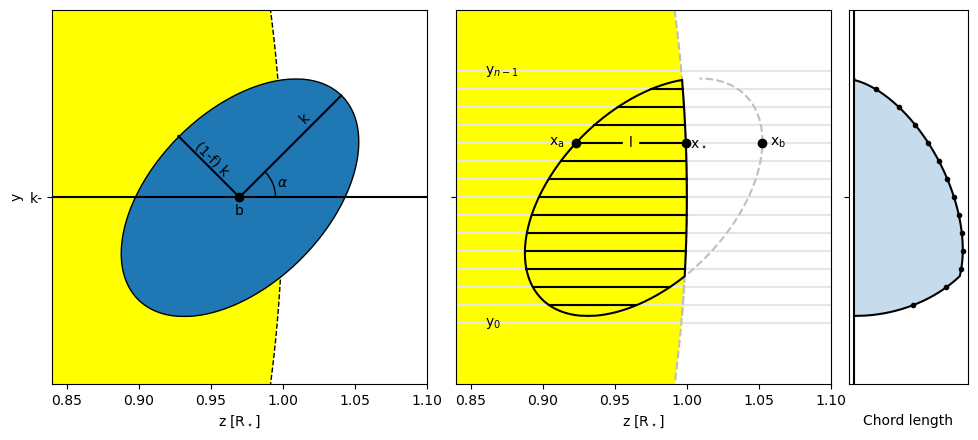

In [90]:
fig, axs = subplots(1, 3, figsize=(10, 4.5), sharey='all', width_ratios=(1, 1, 0.3))

ystar = linspace(-0.15, 0.15, 200)
xstar = sqrt(1 - ystar**2)

ax = axs[0]
ax.fill_betweenx(ystar, xstar, fc='yellow', ls='--', zorder=-20, alpha=1, ec='k')
ax.fill_betweenx(y, b+x[:,0], b+x[:,1], ec='k')
ax.plot(b, 0, 'ok')
ax.plot([b, b+k*sin(alpha)], [0, k*cos(alpha)], 'k')
ax.plot([b, b-k*(1-f)*cos(alpha)], [0, k*(1-f)*cos(alpha)], 'k')
ax.add_patch(Arc((b, 0.0), 0.05, 0.05, angle=0, theta1=0, theta2=degrees(alpha)))
ax.text(b, -0.005, 'b', va='top', ha='center')
ax.text(1.015, 0.06, 'k', va='top', ha='center', rotation=degrees(alpha))
ax.text(0.951, 0.04, '(1-f) k', va='top', ha='center', rotation=-degrees(alpha))
ax.text(1.0, 0.015, r'$\alpha$', va='top', ha='center')
ax.axhline(0, c='k')


axs[1].fill_betweenx(ystar, xstar, fc='yellow', ls='--', zorder=-20, alpha=1)
axs[1].plot(xstar, ystar, c='0.75', ls='--')
axs[1].plot(xi[:,2], y, c='0.75', ls='--')
axs[1].plot(xi[:,0], y, 'k')
axs[1].plot(xi[:,1], y, 'k')
for i in range(nyl):
    axs[1].axhline(yl[i], c='0.9', zorder=-10)
    axs[1].plot(xsl[i,[0,1]], yl[[i, i]], 'k-')

axs[2].axvline(0, c='k')
cl = diff(xi[:,:2], 1).ravel()
axs[2].fill_between(where(isfinite(cl), cl, 0.0), y, 'k-', alpha=0.25)
axs[2].plot(where(isfinite(cl), cl, 0.0), y, 'k-')
axs[2].plot(diff(xsl[:,:2], 1), yl, '.k')

axs[1].text(0.86, yl[0], 'y$_0$', va='center')
axs[1].text(0.86, yl[-1], 'y$_{n-1}$', va='center')

axs[1].text(xsl[10,0]-0.008, yl[10], 'x$_\mathrm{a}$', va='center', ha='right')
#axs[1].text(xsl[10,0]-0.008, ysl[10], 'P$_{p,a}$', va='center', ha='right')
axs[1].text(xsl[10,1]+0.003, yl[10], 'x$_\star$', va='center', ha='left')
axs[1].text(xsl[10,2]+0.005, yl[10], 'x$_\mathrm{b}$', va='center', ha='left')
axs[1].plot(xsl[10,:2], yl[[10,10]], 'ok')
axs[1].plot(xsl[10,2], yl[10], 'ok')

#axs[0].text(xsl[10,0]-0.008, ysl[10], '(x$_{0i}$, y$_i$)', va='center', ha='right')
#axs[0].text(xsl[10,1]+0.003, ysl[10], '(x$_{1i}$, y$_i$)', va='center', ha='left')
axs[1].text(xsl[10,:2].mean(), yl[10], 'l', va='center', ha='center', backgroundcolor='yellow')

setp(axs[0], xlim=(b-0.13, b+0.13), ylim=(-0.13, 0.13), aspect=1, xlabel='z [R$_\star$]', ylabel='y')
setp(axs[1], xlim=(b-0.13, b+0.13), ylim=(-0.13, 0.13), aspect=1, xlabel='z [R$_\star$]')
setp(axs[2], xlabel='Chord length', xticks=[])

fig.align_xlabels()
fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
fig.savefig('opmodel_geometry.pdf')